In [19]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [20]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [21]:
print(x_train.shape) 
print(y_train.shape) 
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [22]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [23]:
model = keras.Sequential();
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
None


In [24]:
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy') #앞에서 배운 것에 sparse가 추가되었다. 이러면 원-핫코딩(to_categorical)을 사용할 필요가 없다
#옵티마이저는 적지 않을 경우 Minibatch-SGD(미니배치 확률적 경사하강법)이 기본값으로 설정되어 있다.
history = model.fit(x_train, y_train,epochs = 20, validation_data = (x_test, y_test))


Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2760 - accuracy: 0.9211 - val_loss: 0.1717 - val_accuracy: 0.9479
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1314 - accuracy: 0.9623 - val_loss: 0.1234 - val_accuracy: 0.9628
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0970 - accuracy: 0.9723 - val_loss: 0.1030 - val_accuracy: 0.9706
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0788 - accuracy: 0.9774 - val_loss: 0.1045 - val_accuracy: 0.9707
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0673 - accuracy: 0.9813 - val_loss: 0.0946 - val_accuracy: 0.9734
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0580 - accuracy: 0.9834 - val_loss: 0.0855 - val_accuracy: 0.9767
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0517 - accuracy: 0.9858 - val_loss: 0.0880 - val_accuracy:

손실곡선

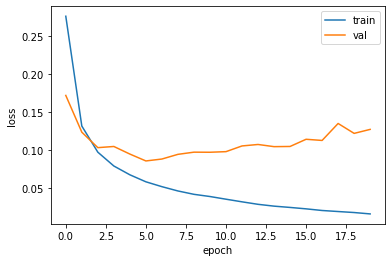

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

모델 저장 및 복원

In [28]:
model.save_weights('model-weights.h5') #모델의 파라미터만 저장
model.save('model-whole.h5') #모델과 파라미터 둘 다 저장
!ls -al *.h5 #노트안에서 셸 명령을 사용할 땐 !을 쓴다

-rw-rw-r-- 1 c4nd0it c4nd0it 661304  1월 12 15:41 best-model.h5
-rw-rw-r-- 1 c4nd0it c4nd0it 332480  1월 12 16:17 model-weights.h5
-rw-rw-r-- 1 c4nd0it c4nd0it 333808  1월 12 16:17 model-whole.h5


In [29]:
model1 = keras.Sequential();
model1.add(keras.layers.Flatten(input_shape=(28,28)))
model1.add(keras.layers.Dense(100,activation='relu'))
model1.add(keras.layers.Dropout(0.3)) #30% 뉴런의 출력을 0으로 만듦
model1.add(keras.layers.Dense(10,activation='softmax'))
model1.load_weights('model-weights.h5') # 저장된 파라미터를 가져온다

In [30]:
pred = model1.predict(x_test)

In [31]:
print('x_test의 0번째 정답은 :',np.argmax(pred[0])) # 모델이 예측한 x_test의 첫번째 값
print('실제 0번째 정답은 :',y_test[0]) # 실제 정답

x_test의 0번째 정답은 : 1
실제 0번째 정답은 : 7


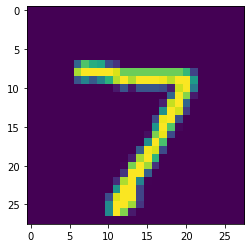

In [32]:
plt.imshow(x_test[0].reshape(28,28)) # 이미지 출력

In [33]:
model2 = keras.models.load_model('model-whole.h5')# 모델과 파라미터를 불러오는 것도 간단하다

In [34]:
model = keras.Sequential();
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dropout(0.3)) 
model.add(keras.layers.Dense(10,activation='softmax'))
print(model.summary())

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5',save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)

model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')
history = model.fit(x_train, y_train,epochs = 20, validation_data = (x_test, y_test),callbacks=[checkpoint_cb,early_stopping_cb])

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 100)               78500     
_________________________________________________________________
dropout_5 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3369 - accuracy: 0.9016 - val_loss: 0.1660 - val_accuracy: 0.9503
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1949 - accuracy: 0.94

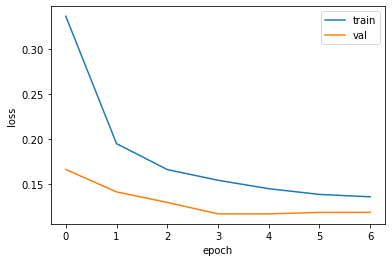

In [35]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()